In [1]:
import edhec_risk_kit as erk
import pandas as pd
import numpy as np
from scipy.optimize import minimize
from numba import njit
import matplotlib as mpl
import matplotlib.pyplot as plt
import cython
mpl.rcParams['figure.dpi'] = 100
mpl.rcParams['figure.figsize'] = (9, 4)
%load_ext autoreload
%autoreload 2
%config Completer.use_jedi = False
%load_ext Cython

In [2]:
ind_return = erk.get_ind_returns()
tmi_return = erk.get_total_market_index_returns()

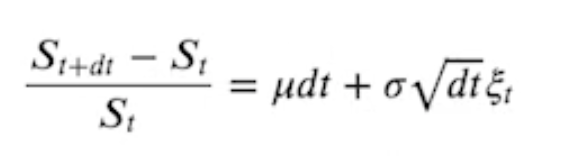

In [9]:
def gbm0(n_years=10, n_scenarios=5000, mu=0.07, sigma=0.15, steps_per_year = 12, s_0 = 100.0):
    """
    Geometric Brownian Motion simulation of a stock price
    """
    
    dt = 1/steps_per_year
    
    n_steps = int(n_years * steps_per_year)
    
    xi = np.random.normal(size=(n_steps, n_scenarios))
    
    rets = mu*dt + sigma*np.sqrt(dt)*xi
    
    rets = pd.DataFrame(rets) # Put into dataframe for simple cumprod to get St+dt series
    
    prices = s_0 * (1 + rets).cumprod() # Perform cumulative product
    
    return prices
    

In [26]:
p = gbm0(n_scenarios=500)
#p = p.mean(axis=0)
p

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,98.816411,105.413736,106.921230,106.359637,103.577559,105.063088,99.758319,103.386871,99.168540,102.990585,...,110.773156,93.212179,100.850464,101.821894,95.382084,95.926145,106.857576,90.703225,96.825959,104.029072
1,101.535743,106.881506,109.289302,108.658720,103.601496,104.444772,99.416384,99.213832,96.712427,105.677122,...,115.759501,94.699095,103.014052,100.604066,100.907005,96.169792,114.179535,91.063606,103.516685,102.713007
2,99.787469,106.078476,107.357373,121.633521,102.783279,104.340283,96.905629,105.266530,101.568502,105.701202,...,111.049099,91.069306,100.946243,93.252997,99.624688,94.243824,110.757819,98.515350,101.342038,106.604718
3,106.431463,109.095861,111.372784,126.841129,106.634387,107.042816,102.042036,104.069032,100.962899,108.348433,...,111.510458,83.962039,98.719498,90.860810,106.141657,83.972634,115.300236,110.178071,99.402423,101.515901
4,105.913720,112.123689,111.127738,117.980320,107.453621,112.185761,94.712517,101.674528,105.222116,105.685378,...,113.693592,86.484672,111.752616,89.900032,108.649630,79.232720,115.803013,105.781483,101.838541,102.048128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,105.615205,197.868682,271.688631,252.225595,194.662365,343.900771,82.953101,193.738133,219.850951,222.882564,...,234.848215,167.152408,219.841248,307.024842,305.376477,107.113941,193.554380,323.340838,213.171134,350.813454
116,105.349688,208.267151,267.611437,279.640603,197.181867,356.591622,84.079664,199.797227,227.862136,245.841936,...,227.501617,176.207539,217.151359,290.590509,316.566412,105.659925,201.855086,322.488046,210.638608,349.056923
117,113.584038,214.916948,264.949689,281.728529,199.262464,370.941774,81.774477,207.167675,220.125257,234.261492,...,224.628073,174.534614,224.616472,290.911891,321.969811,102.456471,209.316444,332.857699,222.553970,339.541824
118,107.913496,199.853014,256.112790,295.724014,213.053528,351.791936,81.372141,210.244316,232.531613,238.336983,...,229.758326,180.435428,229.323954,294.633652,340.956431,99.248460,203.500089,326.124546,224.370434,351.523315


<AxesSubplot:>

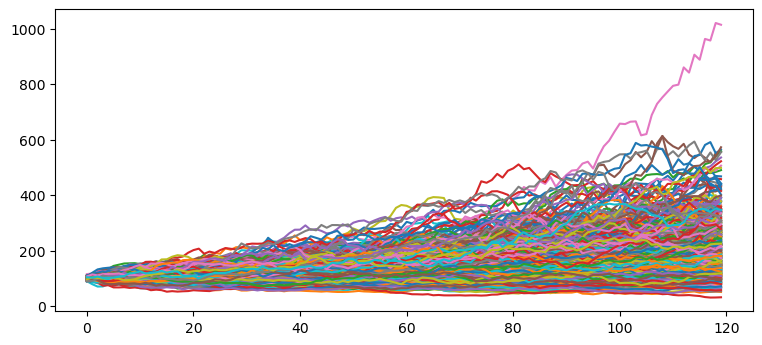

In [27]:
p.plot(legend=False)

In [7]:
def gbm1(n_years=10, n_scenarios=5000, mu=0.07, sigma=0.15, steps_per_year=12, s_0=100.0):
    """
    Geometric Brownian Motion simulation of a stock price
    """

    dt = 1/steps_per_year

    n_steps = int(n_years * steps_per_year)

    rets_plus1 = np.random.normal(loc = ( 1 + mu * dt), scale = (sigma * np.sqrt(dt)), size= (n_steps, n_scenarios))


    # Put into dataframe for simple cumprod to get St+dt series
    #rets = pd.DataFrame(rets_plus1)

    prices = s_0 * pd.DataFrame(rets_plus1).cumprod()  # Perform cumulative product

    return prices

In [8]:
%timeit gbm0(n_years=5, n_scenarios=1000)
%timeit gbm1(n_years=5, n_scenarios=1000)

1.82 ms ± 14.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
1.73 ms ± 16.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


<AxesSubplot:>

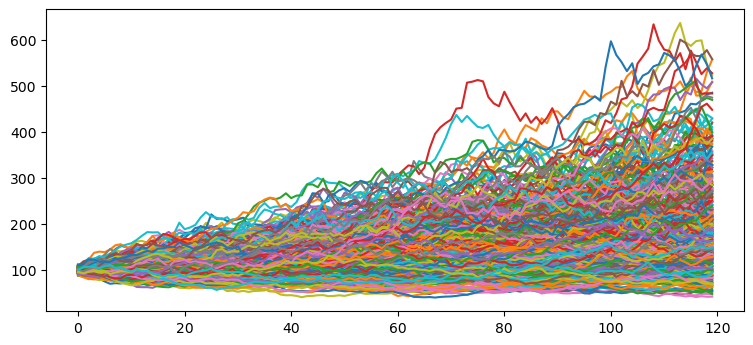

In [9]:
p = gbm1(n_scenarios=500)
p.plot(legend=False)

#### The gbm excercise was meant to demonstrate that adding 1+array is really a 'for loop' under the hood. However, there appears to be no change in runtime, less than 10% reduction in changing the code.

In [15]:
def gbm1(n_years=10, n_scenarios=5000, mu=0.07, sigma=0.15, steps_per_year=12, s_0=100.0):
    """
    Geometric Brownian Motion simulation of a stock price
    """

    dt = 1/steps_per_year

    n_steps = int(n_years * steps_per_year)

    rets_plus1 = np.random.normal(loc = ( 1 + mu * dt), scale = (sigma * np.sqrt(dt)), size= (n_steps, n_scenarios))
    rets_plus1[0] = 1

    # Put into dataframe for simple cumprod to get St+dt series
    #rets = pd.DataFrame(rets_plus1)

    prices = s_0 * pd.DataFrame(rets_plus1).cumprod()  # Perform cumulative product

    return prices

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
1,98.907621,101.229199,98.228932,103.173202,93.530794,107.879412,106.612101,98.273003,104.919037,109.047592,...,103.673912,95.275995,99.574895,97.200620,94.427122,95.875718,95.190248,99.421614,103.098880,106.169423
2,97.980673,99.746599,96.611410,104.273465,92.785022,113.417918,108.282363,104.984007,104.025499,114.509374,...,103.015591,93.325495,101.313133,101.930146,96.711846,94.665084,96.568922,98.777421,103.263993,110.398895
3,101.250577,94.820464,97.458124,107.768257,95.759674,112.365107,102.300232,110.017145,103.592067,109.421992,...,105.871827,91.240649,99.032451,98.643143,95.710574,98.016119,98.132021,104.975634,101.154463,108.466238
4,104.062908,96.865022,101.499451,110.526284,101.317088,112.127526,102.939610,106.406656,104.216434,106.713910,...,93.357280,88.744069,100.333332,99.513034,92.466122,92.631342,104.617684,103.448297,100.223403,109.342733


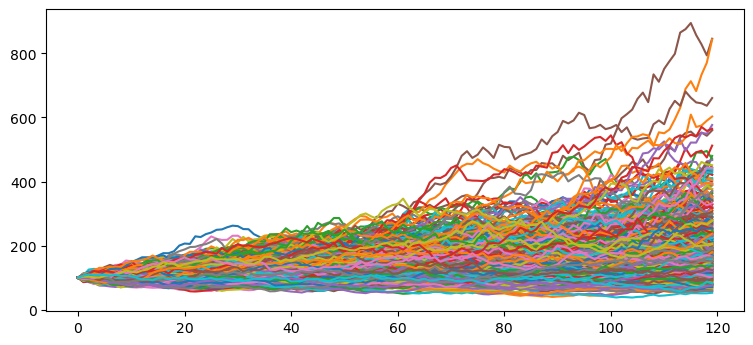

In [16]:
p = gbm1(n_scenarios=500)
p.plot(legend=False)
p.head()